In [1]:
#한글 폰트 가져와야 함. 코랩은 한글폰트 지원하지 않음

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image # 이미지 데이터 불러오고 처리하는 라이브러리
from tqdm import tqdm # for문이 언제끝나는지 알려주는 라이브러리
import re # 정규표현식 라이브러리

In [2]:
total=[]

for n in tqdm(range(1,192,10)):

    url=requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=318&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&\start={}'.format(n))
    html=BeautifulSoup(url.text)
    news=html.find('ul',class_='list_news').find_all('li',class_='bx')

    
    for i in news:
        title=i.find('a',class_='news_tit').text
        content=(i.find('a',class_='api_txt_lines dsc_txt_wrap').text)
        total.append([title,content])

100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


In [3]:
len(total)

200

In [4]:
df=pd.DataFrame(total,columns=['제목','요약'])
df

,제목,요약
0,"GM, 한국에 20년간 9조원 이상 투자했다","미국의 자동차 기업 제너럴 모터스(General Motors, 이하 GM)가 한국 ..."
1,"美, '전략자산 상시배치' 묻자 ""주한미군 주둔이 한국방위 약속""(종합)",이것이 한국 방위에 대한 미국의 약속이라고 언급했다. 패트릭 라이더 미 국방부 대변...
2,"美 냉동공조설비 인증, 이제 한국서 받는다…시간·비용 절감",기사내용 요약 인천 한국공기과학시험연구원 개원 AHRI 한국시험소…아시아 두 번째 ...
3,"미 ""전략자산 상시배치? 주한미군이 한국방위 약속""",주한미군이 한국을 지킬 거라며 부정적 시각을 보였습니다. 워싱턴에서 김윤수 특파원입...
4,"한국 고용률, OECD 국가 중 23위→29위로 뒷걸음질",2배↑ 5계단 올랐지만 여전히 하위권 최저임금은 24위서 20위로 상승 한국이 고용...
...,...,...
195,"美전문가 “한국 핵무장 반대, 나토식 핵공유 논의는 가능”",미국 싱크탱크 헤리티지재단이 한국의 자체 핵무장이나 전술핵무기 재배치에 부정적인 견...
196,제7회 한국 관상어산업 박람회,19일 경기 시흥시 아쿠아펫랜드에서 열린 제7회 한국관상어산업 박람회에서 시민들이 ...
197,"한국, 카타르 월드컵서 조별리그 3경기 전부 빨강색 유니폼 입는다",이에 따르면 한국은 FIFA의 결정에 따라 오는 11월24일 열리는 우루과이와의 첫...
198,"미 국방부 ""주한미군 주둔은 한국 방위에 대한 약속""",통해 '한국 방어를 위해 미국의 전략 자산이 상시 배치되어야 한다고 보느냐'는 물음...


In [5]:
text=''

for i in total:
    text +=i[0]
    text +='\n'
    text +=i[1]
    text +='\n'
len(text)

31267

In [14]:
text

'GM, 한국에 20년간 9조원 이상 투자했다\n미국의 자동차 기업 제너럴 모터스(General Motors, 이하 GM)가 한국 출범 이후 20년간 9조원 이상을 투자한 것으로 나타났다. GM은 19일 창원공장에서 한국 출범 20주년 기념식을 개최했다. 이날 GM은 최근 창원공장에...\n美, \'전략자산 상시배치\' 묻자 "주한미군 주둔이 한국방위 약속"(종합)\n이것이 한국 방위에 대한 미국의 약속이라고 언급했다. 패트릭 라이더 미 국방부 대변인은 이날 브리핑에서 한국 방어를 위해 미 전략자산이 상시배치되어야 한다고 보느냐는 질문에 "이미 2만8천 명 이상의 미군이...\n美 냉동공조설비 인증, 이제 한국서 받는다…시간·비용 절감\n기사내용 요약 인천 한국공기과학시험연구원 개원 AHRI 한국시험소…아시아 두 번째 공조설비 인증 시간 2주 이상 단축 [서울=뉴시스] 김성진 기자 = 냉동공조 제품 수출에 필수로 여겨지는 미국냉동공조협회(AHRI)...\n미 "전략자산 상시배치? 주한미군이 한국방위 약속"\n주한미군이 한국을 지킬 거라며 부정적 시각을 보였습니다. 워싱턴에서 김윤수 특파원입니다. <기자> 미... 미군이 한국 방위에 대한 약속이라고 즉답을 피했습니다. [패트릭 라이더/미 국방부 대변인 :\xa0이미 2만 8천 명...\n한국 고용률, OECD 국가 중 23위→29위로 뒷걸음질\n2배↑ 5계단 올랐지만 여전히 하위권 최저임금은 24위서 20위로 상승 한국이 고용률, 경제활동 참가율... 전국경제인연합회가 18일 주요 노동지표를 국제 비교한 결과, 2021년 한국의 고용률(15~64세) 순위는 OECD 국가...\n美전문가 “한국 핵무장 반대, 나토식 핵공유 논의는 가능”\n미국 싱크탱크 헤리티지재단이 한국의 자체 핵무장이나 전술핵무기 재배치에 부정적인 견해의 보고서를... 고도화가 한국, 일본, 미국에 큰 위협이 되고 있다고 진단했다. 특히 “북한의 새로운 무기는 이전의 단점을...\n제7회 한국 관상어 산압 박람회\n19일 경기 시흥시 아쿠아펫

In [15]:
box=re.findall('[가-힣]{2,}',text)
len(box)

6196

In [16]:
dic={}

for i in box:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
dic

{'한국에': 20,
 '년간': 40,
 '조원': 40,
 '이상': 40,
 '투자했다': 20,
 '미국의': 60,
 '자동차': 20,
 '기업': 20,
 '제너럴': 20,
 '모터스': 20,
 '이하': 20,
 '한국': 260,
 '출범': 40,
 '이후': 40,
 '이상을': 20,
 '투자한': 20,
 '것으로': 20,
 '나타났다': 20,
 '창원공장에서': 20,
 '주년': 20,
 '기념식을': 20,
 '개최했다': 20,
 '이날': 40,
 '최근': 20,
 '창원공장에': 20,
 '전략자산': 40,
 '상시배치': 40,
 '묻자': 20,
 '주한미군': 40,
 '주둔이': 20,
 '한국방위': 40,
 '약속': 60,
 '종합': 20,
 '이것이': 20,
 '방위에': 60,
 '대한': 80,
 '약속이라고': 40,
 '언급했다': 20,
 '패트릭': 40,
 '라이더': 40,
 '국방부': 60,
 '대변인은': 20,
 '브리핑에서': 20,
 '방어를': 40,
 '위해': 40,
 '전략자산이': 20,
 '상시배치되어야': 20,
 '한다고': 40,
 '보느냐는': 20,
 '질문에': 20,
 '이미': 60,
 '이상의': 40,
 '미군이': 60,
 '냉동공조설비': 20,
 '인증': 40,
 '이제': 20,
 '한국서': 20,
 '받는다': 20,
 '시간': 40,
 '비용': 20,
 '절감': 20,
 '기사내용': 40,
 '요약': 40,
 '인천': 20,
 '한국공기과학시험연구원': 20,
 '개원': 20,
 '한국시험소': 20,
 '아시아': 20,
 '번째': 20,
 '공조설비': 20,
 '단축': 20,
 '서울': 40,
 '뉴시스': 40,
 '김성진': 20,
 '기자': 60,
 '냉동공조': 20,
 '제품': 20,
 '수출에': 20,
 '필수로': 20,
 '여겨지는': 20,
 '미국냉동공조협회': 20,
 '주한미군이':

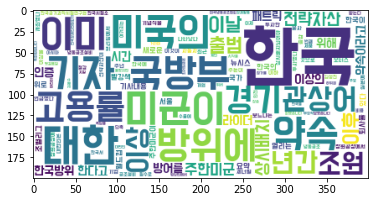

In [9]:
wc=WordCloud(font_path='BMDOHYEON_ttf.ttf',
             background_color='white')

cloud=wc.generate_from_frequencies(dic)
plt.imshow(cloud)

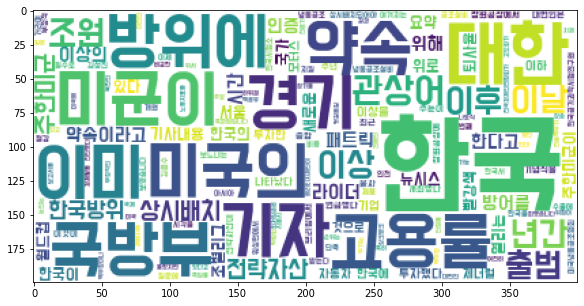

In [10]:
plt.figure(figsize=(10,5))
cloud=wc.generate_from_frequencies(dic)
plt.imshow(cloud)

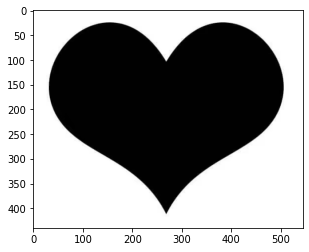

In [11]:
img=Image.open('하트.png')
plt.imshow(img)

In [12]:
img=np.array(img) # 흰색에 가까울수록 255, 0에 가까울수록 검정
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

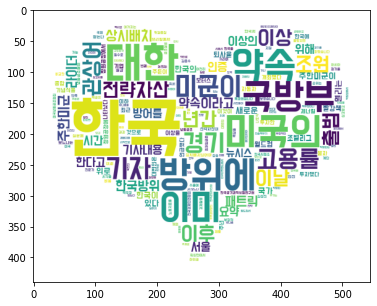

In [18]:
wc=WordCloud(font_path='BMDOHYEON_ttf.ttf',
             background_color='white', mask=img)
plt.figure(figsize=(10,5))
cloud=wc.generate_from_frequencies(dic)
plt.imshow(cloud)